# WeatherPy

## Observations and Inferences

1. As expected, the closer to lat 0, the higher the max temperature. We also note the higher max temps in the southern hemisphere, as it is currently the summer season there at the moment. 

2. there seems to be no strong relationship between latitude and any of the other measures (wind speed, humidity, cloudiness). While there seems to be a positive relationship between humidity and latitude in the northern hemisphere, it is most likely cause by a skew in the data as we have a lot data points in with high latitude values.

3.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import csv

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


SyntaxError: unexpected character after line continuation character (<ipython-input-24-4c4e851a2cf8>, line 12)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
print('Begining Data Retrival')
print('-----------------------------')

city_weather_data = []
unit = 'imperial'

for city in cities:
    city_url = city.replace(" ", "&")
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_url}&appid={weather_api_key}&units={unit}"
    response = requests.get(query_url)
    response_json = response.json()
    if response_json['cod'] == 200:
        city_weather_data.append(response_json)        
        print(f'Processing Record Number {cities.index(city) + 1} | {city}')
    else:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrival is now complete')
    

Begining Data Retrival
-----------------------------
Processing Record Number 1 | bluff
Processing Record Number 2 | mataura
Processing Record Number 3 | bredasdorp
Processing Record Number 4 | hermanus
Processing Record Number 5 | itoman
Processing Record Number 6 | bendigo
Processing Record Number 7 | bambous virieux
Processing Record Number 8 | punta arenas
Processing Record Number 9 | sitka
Processing Record Number 10 | busselton
Processing Record Number 11 | hithadhoo
Processing Record Number 12 | avera
Processing Record Number 13 | kodiak
Processing Record Number 14 | vaasa
Processing Record Number 15 | provideniya
Processing Record Number 16 | naryan-mar
Processing Record Number 17 | kapaa
Processing Record Number 18 | gazojak
Processing Record Number 19 | sulangan
Processing Record Number 20 | taltal
Processing Record Number 21 | atuona
Processing Record Number 22 | ushuaia
Processing Record Number 23 | carnarvon
Processing Record Number 24 | santa barbara
Processing Record Num

Processing Record Number 214 | mount isa
Processing Record Number 215 | wajir
Processing Record Number 216 | asau
Processing Record Number 217 | port blair
Processing Record Number 218 | grakhovo
Processing Record Number 219 | miles city
Processing Record Number 220 | sao filipe
Processing Record Number 221 | mao
Processing Record Number 222 | vaini
Processing Record Number 223 | jvari
Processing Record Number 224 | santarem
Processing Record Number 225 | kurilsk
Processing Record Number 226 | hambantota
Processing Record Number 227 | alice springs
Processing Record Number 228 | xai-xai
Processing Record Number 229 | mys shmidta
Processing Record Number 230 | lazaro cardenas
Processing Record Number 231 | abu dhabi
Processing Record Number 232 | xichang
Processing Record Number 233 | petropavlovsk-kamchatskiy
Processing Record Number 234 | awassa
Processing Record Number 235 | ayan
City not found. Skipping...
Processing Record Number 237 | verkhoturye
Processing Record Number 238 | aso

Processing Record Number 424 | nenagh
Processing Record Number 425 | moindou
Processing Record Number 426 | tornio
Processing Record Number 427 | marsa matruh
Processing Record Number 428 | kamenka
Processing Record Number 429 | caucaia
Processing Record Number 430 | doha
Processing Record Number 431 | simao
Processing Record Number 432 | havre-saint-pierre
Processing Record Number 433 | sao felix do xingu
Processing Record Number 434 | port said
Processing Record Number 435 | geraldton
City not found. Skipping...
Processing Record Number 437 | kieta
Processing Record Number 438 | sorland
Processing Record Number 439 | mathbaria
Processing Record Number 440 | banda aceh
Processing Record Number 441 | praia
Processing Record Number 442 | areia branca
Processing Record Number 443 | ormara
Processing Record Number 444 | hofn
Processing Record Number 445 | kailua
Processing Record Number 446 | russell
Processing Record Number 447 | udachnyy
Processing Record Number 448 | rawson
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
city_weather_data[0]

{'coord': {'lon': 168.3333, 'lat': -46.6},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 46.38,
  'feels_like': 39.96,
  'temp_min': 46.38,
  'temp_max': 46.38,
  'pressure': 1024,
  'humidity': 82,
  'sea_level': 1024,
  'grnd_level': 1021},
 'visibility': 10000,
 'wind': {'speed': 7.9, 'deg': 67},
 'clouds': {'all': 34},
 'dt': 1612462591,
 'sys': {'country': 'NZ', 'sunrise': 1612460684, 'sunset': 1612512993},
 'timezone': 46800,
 'id': 2206939,
 'name': 'Bluff',
 'cod': 200}

In [19]:
name = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
win_speed = []
country = []
date = []

for i in range(len(city_weather_data)):
    name.append(city_weather_data[i]['name'])
    lat.append(city_weather_data[i]['coord']['lat'])
    lon.append(city_weather_data[i]['coord']['lon'])
    temp_max.append(city_weather_data[i]['main']['temp_max'])
    humidity.append(city_weather_data[i]['main']['humidity'])
    clouds.append(city_weather_data[i]['clouds']['all'])
    win_speed.append(city_weather_data[i]['wind']['speed'])
    country.append(city_weather_data[i]['sys']['country'])
    date.append(city_weather_data[i]['dt'])
    
city_weather_data_df = pd.DataFrame({
    'City' : name,
    'Lat' : lat,
    'Lng' : lon,
    'Max Temp' : temp_max,
    'Humidity' : humidity,
    'Cloudiness' : clouds,
    'Wind Speed' : win_speed,
    'Country' : country,
    'Date' : date
})

city_weather_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,46.38,82,34,7.90,NZ,1612462591
1,Mataura,-46.1927,168.8643,40.48,93,39,3.67,NZ,1612462591
2,Bredasdorp,-34.5322,20.0403,68.00,68,84,5.75,ZA,1612462591
3,Hermanus,-34.4187,19.2345,71.01,73,49,1.99,ZA,1612462591
4,Itoman,26.1247,127.6694,60.80,67,20,8.05,JP,1612462592


In [28]:
city_weather_data_df.agg(['count','mean','median','min','max'])

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,534,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534,5.340000e+02
min,Adrar,-54.800000,-175.200000,-49.000000,8.000000,0.000000,0.270000,AF,1.612462e+09
max,Āsosa,78.218600,179.316700,102.060000,100.000000,100.000000,41.430000,ZW,1.612463e+09
mean,NaN,22.657946,24.564092,50.819532,71.065543,52.758427,7.661648,NaN,1.612463e+09
median,NaN,25.334950,26.658350,60.415000,77.000000,61.000000,6.105000,NaN,1.612463e+09


In [7]:
#export to csv
city_weather_data_df.to_csv(header = True, index = False)

"City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date\nBluff,-46.6,168.3333,281.14,82,34,3.53,NZ,1612461940\nMataura,-46.1927,168.8643,278.14,93,29,1.66,NZ,1612461940\nBredasdorp,-34.5322,20.0403,294.15,64,84,4.63,ZA,1612461940\nHermanus,-34.4187,19.2345,294.82,73,40,1.34,ZA,1612461724\nItoman,26.1247,127.6694,289.15,63,20,3.09,JP,1612461677\nBendigo,-36.7667,144.2833,293.15,54,100,0.89,AU,1612461941\nBambous,-20.2567,57.4061,300.15,74,20,4.12,MU,1612461941\nPunta,8.9897,125.34,296.83,85,65,1.83,PH,1612461942\nSitka,57.0531,-135.33,275.15,100,90,0.86,US,1612461942\nBusselton,-33.65,115.3333,285.93,66,0,5.45,AU,1612461859\nHithadhoo,-0.6,73.0833,301.07,77,75,4.83,MV,1612461664\nAvera,33.194,-82.5271,284.26,30,1,1.54,US,1612461786\nSaint Paul Harbor,57.79,-152.4072,265.15,86,75,3.09,US,1612461942\nVaasa,63.096,21.6158,265.37,85,75,1.03,FI,1612461942\nProvideniya,64.3833,-173.3,248.71,86,99,11.89,RU,1612461943\nNaryan-Mar,67.6713,53.087,247.48,89,69,4.19,RU,1612461943\nKapaa,

In [ ]:

# fields = ['name', 'lat', 'lon', 'temp_max','humidity','clouds', 'speed','country','dt' ]
# fields_names = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_weather_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [41]:
#  Get the indices of cities that have humidity over 100%.
over_100 = city_weather_data_df.loc[city_weather_data_df['Humidity']>100]
over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [42]:
#make a copy to work with
clean_df = city_weather_data_df.copy()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [30]:
clean_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

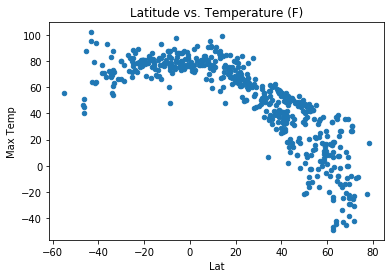

In [81]:
clean_df.plot('Lat','Max Temp',kind = 'scatter',title = 'Latitude vs. Temperature (F)')

## Latitude vs. Humidity Plot

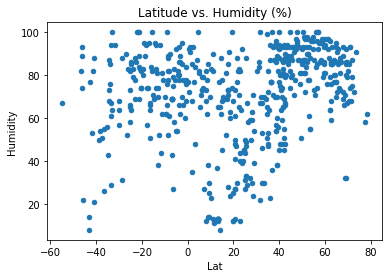

In [82]:
clean_df.plot('Lat','Humidity',kind = 'scatter',title = 'Latitude vs. Humidity (%)')

## Latitude vs. Cloudiness Plot

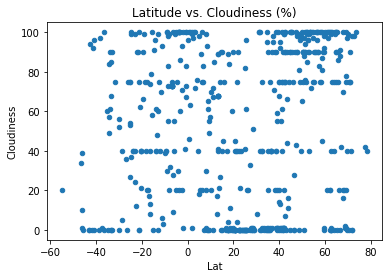

In [83]:
clean_df.plot('Lat','Cloudiness',kind = 'scatter',title = 'Latitude vs. Cloudiness (%)')

## Latitude vs. Wind Speed Plot

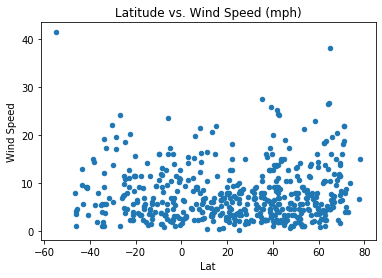

In [84]:
clean_df.plot('Lat','Wind Speed',kind = 'scatter',title = 'Latitude vs. Wind Speed (mph)')

## Linear Regression

In [48]:
clean_df.columns
north_df = clean_df[clean_df['Lat']>0]
south_df = clean_df[clean_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.74504407364625


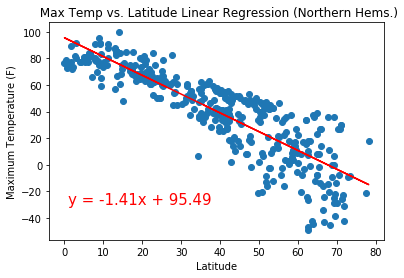

In [69]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-30),fontsize=15,color="red")
plt.title(' Max Temp vs. Latitude Linear Regression (Northern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.13130367792485892


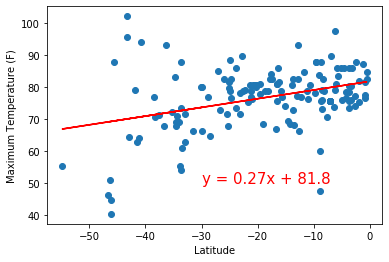

In [55]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title(' Max Temp vs. Latitude Linear Regression (Southern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20161421213388322


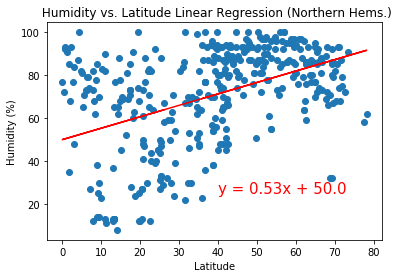

In [70]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title(' Humidity vs. Latitude Linear Regression (Northern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04977899410274056


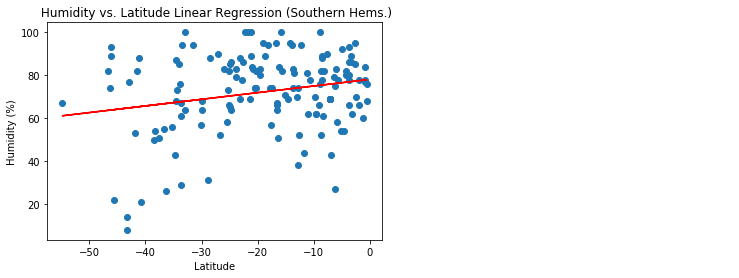

In [73]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title(' Humidity vs. Latitude Linear Regression (Southern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05697617661429049


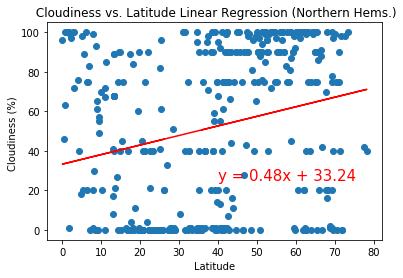

In [71]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title(' Cloudiness vs. Latitude Linear Regression (Northern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10710650979154487


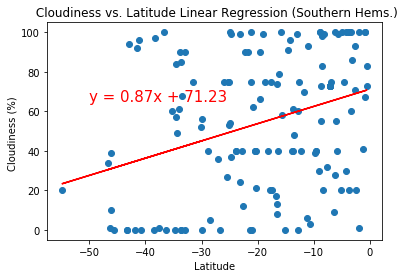

In [74]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")
plt.title(' Cloudiness vs. Latitude Linear Regression (Southern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025446410717687704


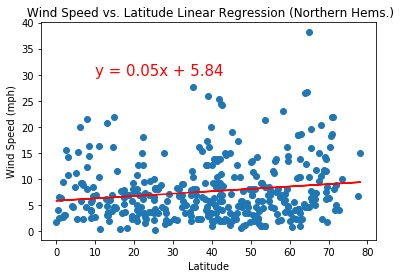

In [72]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title(' Wind Speed vs. Latitude Linear Regression (Northern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02855678967836828


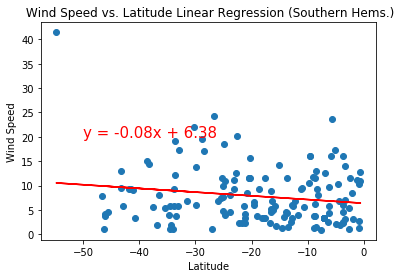

In [75]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title(' Wind Speed vs. Latitude Linear Regression (Southern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()